## LANGUAGE IDENTIFIER
### Veronica Mangiaterra a.y. 2020-2021

The aim of this project is to train a classifier that identifies in which language a text is written.
The work is organized following these steps:
1. Scraping 
2. Preprocessing
3. Vectorization and training of the model 
4. Evaluation

### 1. SCRAPING
I used Selenium to navigate through different pages and Requests and BeautifulSoup to get the text from the pages

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options 
options = Options()
options.add_argument("--headless")#this is used to avoid to open the browser
driver = webdriver.Chrome(r"C:/Users/user/Documents/UniTn_LM_Cognitive_Science/Computational_Skills_for_Text_Analysis/executables/chromedriver.exe", options=options)
import requests
from bs4 import BeautifulSoup

In [2]:
wiki_url_list = ["https://it.wikipedia.org/wiki/Pagina_principale", "https://es.wikipedia.org/wiki/Wikipedia:Portada", "https://fr.wikipedia.org/wiki/Wikip%C3%A9dia:Accueil_principal", "https://nl.wikipedia.org/wiki/Hoofdpagina"]
path_txt = [r"C:\Users\user\Desktop\it_txt.txt", r"C:\Users\user\Desktop\es_txt.txt", r"C:\Users\user\Desktop\fr_txt.txt", r"C:\Users\user\Desktop\ne_txt.txt" ]

In [3]:
def get_random_page(wiki_url):
"""This first function is used to obtain the text associated with the link to the random page in the wikipedia homepage"""
    rand_response = requests.get(wiki_url)
    rand_source = rand_response.text
    rand_soup = BeautifulSoup(rand_source, "lxml")
    random_page = rand_soup.find("li", id= "n-randompage")
    return random_page.get_text()

In [4]:
random_texts = [get_random_page(url)for url in wiki_url_list]

In [51]:
zip_wiki_random_txt = zip(wiki_url_list, random_texts, path_txt)
wiki_random_txt = tuple(zip_wiki_random_txt) #I stored in a variable, all three items that I need as input of the next function
wiki_random_txt[0]

('https://it.wikipedia.org/wiki/Pagina_principale',
 'Una voce a caso',
 'C:\\Users\\user\\Desktop\\it_txt.txt')

In [53]:
def get_content (wiki_url,random, path): 
# this function gets as an input a wikipedia url, the text associated with the 'random page' link and a path to a txt fil where
# it will store the text. It goes to the home page of wikipedia and till it collects 1.000.000 words, it keeps navigating the 
# random page and appending the text to a list. When it get to the number of words required, it open the txt file and write there
# the text
    l_one = [] #I created a list, where all the text will be stored
    driver.get(wiki_url)
    while len(l_one)<100:
        driver.find_element_by_link_text(random).click() #with the"find element by link text" method the first
        #element with the link text value matching the location will be returned, then with the "click" method it's possible to
        # click in that link
        response= requests.get(driver.current_url)
        source = response.text
        soup = BeautifulSoup(source, "lxml")
        some_wiki = soup.find_all("p")
        l=[]
        l_=[]
        for tag in some_wiki:
            l.append(tag.get_text())
        print(l)
        for sent in l:
            print(sent)
            l_.append(sent.split(" "))
        print(l_)
        for sent in l_:
            for word in sent:
                l_one.append(word)
        print(l_one)
        print(len(l_one))
    txt = open(path, "a", encoding="utf8")
    txt.write(" ".join(l_one))
    txt.close()
    return len(l_one)

In [55]:
get_content('https://it.wikipedia.org/wiki/Pagina_principale',
 'Una voce a caso',
 'C:\\Users\\user\\Desktop\\it_txt.txt')

["Il calcar, conosciuto anche come calcaneum [1], è uno sperone cartilagineo che sorge poco al disopra della caviglia e si sviluppa lungo il bordo estremo dell'uropatagio nei pipistrelli [1][2], con la funzione di aiutare il dispiegamento della membrana stessa.[3]\nTale membrana forma una sacca che aiuta a cacciare e mantenere gli insetti catturati in volo[1]. In alcune forme è presente lungo il margine esterno del calcar stesso una carenatura di supporto.\n", "L'antenato più antico degli odierni pipistrelli, Icaronycteris index, apparentemente non aveva né un calcar né qualcosa di simile.[4].\n"]
Il calcar, conosciuto anche come calcaneum [1], è uno sperone cartilagineo che sorge poco al disopra della caviglia e si sviluppa lungo il bordo estremo dell'uropatagio nei pipistrelli [1][2], con la funzione di aiutare il dispiegamento della membrana stessa.[3]
Tale membrana forma una sacca che aiuta a cacciare e mantenere gli insetti catturati in volo[1]. In alcune forme è presente lungo il

163

In [47]:
for wiki, rand, path in wiki_random_txt:
    get_content(wiki, rand, path)

505
133
855
165


### 2. PRE-PROCESSING

In [106]:
def pre_processing (path):
    text = open(path, "r", encoding= "utf-8")
    words = text.read().split(" ")
    a = []
    for word in words:
        word = word.lower() 
        word = re.sub("[0-9]", "", word)
        word = re.sub(r'[^\w\s]', "", word)
        word = re.sub("\n", "", word)
        a.append(word)
    b = " ".join(a)
    text.close()
    text_write = open(path, "w", encoding = "utf-8")
    text_write.write(b)
    return b
        

In [116]:
new_path = [r"C:\Users\user\Documents\text\it_txt.txt",r"C:\Users\user\Documents\text\es_txt.txt",r"C:\Users\user\Documents\text\fr_txt.txt",r"C:\Users\user\Documents\text\ne_txt.txt"]

In [207]:
ita = pre_processing (r"C:\Users\user\Documents\text\it_txt.txt")

'koudiat bni dghough  in arabo كدية بني دغوغ è un centro abitato e comune rurale del marocco situato nella provincia di sidi bennour regione di casablancasettat conta una popolazione di \xa0 abitanti censimento  comuni del marocco the silent man è un singolo del gruppo musicale statunitense dream theater pubblicato nel  come secondo estratto dal terzo album in studio awake si tratta della terza ed ultima parte della suite a mind beside itself contenuta nellalbum per molto tempo il brano non è mai stato eseguito dal vivo nella versione originale una prima registrazione ufficiale di una sua esecuzione dal vivo nella versione originale è contenuta nel video awake live in japan  in cui john myung suona a fasi alterne sia la seconda chitarra che il basso mentre mike portnoy affianca gli altri componenti suonando un set di percussioni durante il tour di supporto allalbum metropolis pt  scenes from a memory i dream theater hanno iniziato ad eseguire una versione di the silent man riarrangiata

In [195]:
def fivek_dataframe (path):
    d= {}
    text = open(path, "r", encoding= "utf-8")

    splitted = text.read().split(" ")
    for word in splitted:
        if word not in d:
            d[word]=1
        if word in d:
            d[word]+=1
    dict_ = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
    dict_keys= dict_.keys()
    fivek = " ".join(list(dict_keys)[:5000])
#     freq_text = open (path_due, "w", encoding = "utf-8")
#     freq_text.write(fivek)
#     freq_df = pd.read_csv(path_due, "utf-8", header= None, names= [lang], engine="python")
#     df = pd.DataFrame(fivek, columns=[lang])
#     for i, line in df.iterrows():
#         line = line[lang]
#         if len(line) != 0:
#             data_freq.append(line)
#             lang_freq.append(lang)
    return fivek

In [197]:
data_ita_freq= []
lang_ita_freq = []
ita = fivek_dataframe(r"C:\Users\user\Documents\text\it_txt.txt",r"C:\Users\user\Documents\text\it_freq.txt")
fr = fivek_dataframe(r"C:\Users\user\Documents\text\fr_txt.txt",r"C:\Users\user\Documents\text\fr_freq.txt")
es = fivek_dataframe(r"C:\Users\user\Documents\text\es_txt.txt",r"C:\Users\user\Documents\text\es_freq.txt")
ne = fivek_dataframe(r"C:\Users\user\Documents\text\ne_txt.txt", r"C:\Users\user\Documents\text\ne_freq.txt")
# ita_freq = pd.read_csv(r"C:\Users\user\Documents\text\it_freq.txt", "utf-8", header= None, names= ["Italian"], engine="python")
# fr_freq = pd.read_csv(r"C:\Users\user\Documents\text\fr_freq.txt", "utf-8", header= None, names= ["French"], engine="python")
# es_freq = pd.read_csv(r"C:\Users\user\Documents\text\es_freq.txt", "utf-8", header= None, names= ["Spanish"], engine="python")
# ne_freq = pd.read_csv(r"C:\Users\user\Documents\text\ne_freq.txt", "utf-8", header= None, names= ["Dutch"], engine="python")

In [209]:
data = {'Text': [ita, fr, es, ne],
        'Language': ["Italian", "French", "Spanish", "Dutch"]}
df_train = pd.DataFrame(data)
df_train

Text Language
0  koudiat bni dghough  in arabo كدية بني دغوغ è ...  Italian
1  de  la le et en à les des du est un dans il un...   French
2  de la en  el y a que los del se por un con las...  Spanish
3   de van in het een en is op voor door met zijn...    Dutch

In [217]:
train_X = df_train['Text']   
train_y = df_train['Language']   
test_X = df_onem['Text']
test_y = df_onem['language']

In [237]:
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(train_X)
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Italian','French','Spanish','Dutch'],columns = tfidf_tokens)
# tf_vectorizer = CountVectorizer()
# X_train_tf = tf_vectorizer.fit_transform(train_X)
# print(X_train_tf.toarray())
# print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % tfidf_wm.shape)

n_samples: 4, n_features: 94887


In [238]:
X_test_tf = tfidfvectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 121829, n_features: 94887


In [219]:
X_test_tf = tf_vectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 121829, n_features: 94887


In [239]:

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

MultinomialNB()

In [240]:
y_pred = naive_bayes_classifier.predict(X_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(test_y, y_pred,
                                            target_names=['Italian', 'French', 'Spanish', 'Dutch']))
print(metrics.confusion_matrix(test_y, y_pred))

accuracy:   0.756
              precision    recall  f1-score   support

     Italian       0.85      0.90      0.87     48678
      French       0.98      0.63      0.76     26794
     Spanish       0.54      0.88      0.67     24741
       Dutch       0.79      0.44      0.56     21616

    accuracy                           0.76    121829
   macro avg       0.79      0.71      0.72    121829
weighted avg       0.80      0.76      0.75    121829

[[44042   200  2659  1777]
 [ 3107 16806  6667   214]
 [ 2320    63 21866   492]
 [ 2534    85  9562  9435]]


In [226]:
V, z = df_onem.iloc[:,0],df_onem.iloc[:,1]
V_train, V_test, z_train, z_test = train_test_split(V, z, test_size=0.2,random_state=None)

In [241]:
tf_vectorizer = CountVectorizer()
V_train_tf = tfidfvectorizer.fit_transform(V_train)
print("n_samples: %d, n_features: %d" % V_train_tf.shape)

n_samples: 97463, n_features: 269142


In [242]:
V_test_tf = tfidfvectorizer.transform(V_test)
print("n_samples: %d, n_features: %d" % V_test_tf.shape)

n_samples: 24366, n_features: 269142


In [243]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(V_train_tf, z_train)

MultinomialNB()

In [244]:
z_pred = naive_bayes_classifier.predict(V_test_tf)

# compute the performance measures
score1 = metrics.accuracy_score(z_test, z_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(z_test, z_pred,
                                            target_names=['Italian', 'French', 'Spanish', 'Dutch']))
print(metrics.confusion_matrix(z_test, z_pred))

accuracy:   0.921
              precision    recall  f1-score   support

     Italian       0.86      0.98      0.92      9807
      French       0.97      0.89      0.93      5365
     Spanish       0.98      0.89      0.93      4917
       Dutch       0.99      0.86      0.92      4277

    accuracy                           0.92     24366
   macro avg       0.95      0.91      0.92     24366
weighted avg       0.93      0.92      0.92     24366

[[9624   70   75   38]
 [ 570 4774   14    7]
 [ 509   45 4360    3]
 [ 519   48   17 3693]]


In [184]:
list_ = [ita, fr, es, ne]
vectorizer = feature_extraction.text.TfidfVectorizer()
vectorizer.fit(list_)

AttributeError: 'TfidfVectorizer' object has no attribute 'toarray'

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(list_)
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Italian','French','Spanish','Dutch'],columns = tfidf_tokens)
print(df_tfidfvect)

               aa       aan    aanbod  aandacht   aandeel  aandelen  \
Italian  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
French   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Spanish  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Dutch    0.014758  0.014758  0.014758  0.014758  0.014758  0.014758   

         aanduiding  aangeboden  aangebracht  aangeduid  ...    último  \
Italian    0.000000    0.000000     0.000000   0.000000  ...  0.000000   
French     0.000000    0.000000     0.000000   0.000000  ...  0.000000   
Spanish    0.000000    0.000000     0.000000   0.000000  ...  0.014792   
Dutch      0.014758    0.014758     0.014758   0.014758  ...  0.000000   

          últimos     única  únicamente     único    únicos      útil  \
Italian  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
French   0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
Spanish  0.014792  0.014792    0.014792  0.014792  0.0

In [87]:
# dict_keys= frequencies.keys()
# type(dict_keys)
# ita_fivek = list(dict_keys)[:5000]
# type(ita_fivek)
# it_freq_df = pd.DataFrame(ita_fivek, columns=["Italian"])

In [147]:
data_ita_freq= []
lang_ita_freq = []
data_fr_freq = []
lang_fr_freq = []
data_es_freq = []
lang_es_freq =[]
data_ne_freq= []
lang_ne_freq=[]
fivek_dataframe(r"C:\Users\user\Documents\text\it_txt.txt","Italian",data_ita_freq,lang_ita_freq)
fivek_dataframe(r"C:\Users\user\Documents\text\fr_txt.txt","French",data_fr_freq,lang_fr_freq)
fivek_dataframe(r"C:\Users\user\Documents\text\es_txt.txt","Spanish",data_es_freq,lang_es_freq)
fivek_dataframe(r"C:\Users\user\Documents\text\ne_txt.txt","Dutch",data_ne_freq,lang_ne_freq)
df_freq = pd.DataFrame({"Text": data_ita_freq+data_fr_freq+data_es_freq+data_ne_freq,
                  "language": lang_ita_freq+lang_fr_freq+lang_es_freq+lang_ne_freq})
df_freq

Text language
0           di  Italian
1            e  Italian
2           il  Italian
3           la  Italian
4           in  Italian
...        ...      ...
19991  karpers    Dutch
19992  kwestie    Dutch
19993    roept    Dutch
19994   office    Dutch
19995   uiteen    Dutch

[19996 rows x 2 columns]

In [134]:
# data_ita_freq= []
# lang_ita_freq = []
# data_fr_freq = []
# lang_fr_freq = []
# data_es_freq = []
# lang_es_freq =[]
# data_ne_freq= []
# lang_ne_freq=[]
# for i, line in it_freq_df.iterrows():
#     line = line['Italian']
#     if len(line) != 0:
#         data_ita_freq.append(line)
#         lang_ita_freq.append("Italian")
# for i, line in fr_freq_df.iterrows():
#     line = line['French']
#     if len(line) != 0:
#         data_fr_freq.append(line)
#         lang_fr_freq.append("French")
# for i, line in es_freq_df.iterrows():
#     line = line['Spanish']
#     if len(line) != 0:
#         data_es_freq.append(line)
#         lang_es_freq.append("Spanish")
# for i, line in ne_freq_df.iterrows():
#     line = line['Dutch']
#     if len(line) != 0:
#         data_ne_freq.append(line)
#         lang_ne_freq.append("Dutch")
# df_freq = pd.DataFrame({"Text": data_ita_freq+data_fr_freq+data_es_freq+data_ne_freq,
#                   "language": lang_ita_freq+lang_fr_freq+lang_es_freq+lang_ne_freq})

NameError: name 'fr_freq_df' is not defined

## Vectorizer and training of the model

In [151]:
V, z = df_freq.iloc[:,0],df_freq.iloc[:,1]
V_train, V_test, z_train, z_test = train_test_split(V, z, test_size=0.2,random_state=0)
V_train

pandas.core.series.Series

In [144]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = feature_extraction.text.TfidfVectorizer()
nbClassifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
#     ('clf', linear_model.LogisticRegression(max_iter=10000))
# ])
    ('clf', nbClassifier)
])
pipe.fit(V_train, z_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=10000))])

In [145]:
z_predicted = pipe.predict(V_test)
z_predicted

array(['Spanish', 'Spanish', 'Spanish', ..., 'Spanish', 'Spanish',
       'Spanish'], dtype=object)

## Evaluation

In [146]:
acc =(metrics.accuracy_score(z_test, z_predicted))*100

matrix = metrics.confusion_matrix(z_test, z_predicted)
print("Accuracy:", acc)
print("Confusion matrix:",
      matrix )


Accuracy: 20.95
Confusion matrix: [[  0  43  43 953]
 [ 30  11  47 944]
 [ 30  35   0 899]
 [ 23  20  95 827]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Italian', 'Spanish', 'French', 'Dutch'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[ 14 805 119  26]
 [820   0 119  26]
 [186 820   0  26]
 [185 828  26   0]]


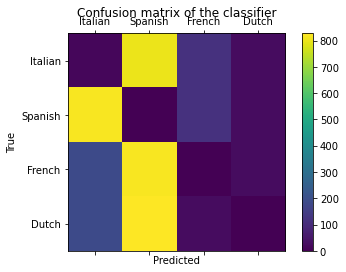

In [100]:
from sklearn.metrics import confusion_matrix
labels = ['Italian', 'Spanish', "French", "Dutch"]
cm = confusion_matrix(z_test, z_predicted, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [152]:
ita_df = pd.read_csv(r"C:\Users\user\Desktop\it_txt.txt", "utf-8", header= None, names= ["Italian"], engine="python")
fr_df = pd.read_csv(r"C:\Users\user\Desktop\fr_txt.txt", "utf-8", header= None, names= ["French"], engine="python")
es_df = pd.read_csv(r"C:\Users\user\Desktop\es_txt.txt", "utf-8", header= None, names= ["Spanish"], engine="python")
ne_df = pd.read_csv(r"C:\Users\user\Desktop\ne_txt.txt", "utf-8", header= None, names= ["Dutch"], engine="python")
ita_df

Italian
0      Koudiat Bni Dghough  (in arabo: ÙƒØ¯ÙŠØ© Ø¨Ù†Ù...
1                                     Comuni del Marocco
2      The Silent Man Ã¨ un singolo del gruppo musica...
3      Si tratta della terza ed ultima parte della su...
4      Per molto tempo, il brano non Ã¨ mai stato ese...
...                                                  ...
24736  Ratti Ã¨ stato inoltre uno dei promotori del P...
24737  Ratti Ã¨ l'autore di piÃ¹ di 500 pubblicazioni...
24738  In un influente articolo apparso su Environmen...
24739  Protagonista del dibattito internazionale sui ...
24740                                     Altri progetti

[24741 rows x 1 columns]

In [18]:
def pre_process (csv_df, lang, data_list, lang_list):
    for i, line in csv_df.iterrows():
        line = line[lang]
        if len(line) != 0:
            line = line.lower()
            line = re.sub("[0-9]", "", line)
            line = re.sub(r'[^\w\s]', "", line)
            data_list.append(line)
            lang_list.append(lang)
    return len(data_list)==len(lang_list)

In [19]:
data_ita= []
lang_ita = []
data_fr = []
lang_fr = []
data_es = []
lang_es =[]
data_ne= []
lang_ne=[]
pre_process(ita_df, "Italian", data_ita, lang_ita)
pre_process(fr_df, "French", data_fr, lang_fr)
pre_process(es_df, "Spanish", data_es, lang_es)
pre_process(ne_df, "Dutch", data_ne, lang_ne)

True

In [211]:
df_onem = pd.DataFrame({"Text": data_ita+data_fr+data_es+data_ne,
                  "language": lang_ita+lang_fr+lang_es+lang_ne})
df_onem

Text language
0       koudiat bni dghough  in arabo ùƒøùšø øùùš øøºù...  Italian
1                                      comuni del marocco  Italian
2       the silent man ã un singolo del gruppo musical...  Italian
3       si tratta della terza ed ultima parte della su...  Italian
4       per molto tempo il brano non ã mai stato esegu...  Italian
...                                                   ...      ...
121824  de gebroeders van limburg afkomstig uit nijmeg...    Dutch
121825  door het uitbreken van de honderdjarige oorlog...    Dutch
121826  ook de brugse productie van miniaturen grijpt ...    Dutch
121827                      enkele karakteristieke werken    Dutch
121828  byzantijnse kunst â merovingische kunst â insu...    Dutch

[121829 rows x 2 columns]

In [18]:


# for i, line in ita_df.iterrows():
#     line = line['Italian']
#     if len(line) != 0:
#         line = line.lower()
#         line = re.sub("[0-9]", "", line)
#         line = re.sub(r'[^\w\s]', "", line)
#         data_ita.append(line)
#         lang_ita.append("Italian")
# for i, line in fr_df.iterrows():
#     line = line['French']
#     if len(line) != 0:
#         line = line.lower()
#         line = re.sub("[0-9]", "", line)
#         line = re.sub(r'[^\w\s]', "", line)
#         data_fr.append(line)
#         lang_fr.append("French")
# for i, line in es_df.iterrows():
#     line = line['Spanish']
#     if len(line) != 0:
#         line = line.lower()
#         line = re.sub("[0-9]", "", line)
#         line = re.sub(r'[^\w\s]', "", line)
#         data_es.append(line)
#         lang_es.append("Spanish")
# for i, line in ne_df.iterrows():
#     line = line['Dutch']
#     if len(line) != 0:
#         line = line.lower()
#         line = re.sub("[0-9]", "", line)
#         line = re.sub(r'[^\w\s]', "", line)
#         data_ne.append(line)
#         lang_ne.append("Dutch")

In [33]:
X, y = df.iloc[:,0],df.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)
X_train

22461     oltre ai temi ricorrenti presentati in ogni li...
74828                        kmâ² geheel bestaande uit land
78203                                                     â
101947    de overlevering spreekt over een stervende man...
87294                                                     â
                                ...                        
70439     actualmente el palacio imperial es un centro c...
43742     ã loccasion des ãlections lãgislatives anticip...
15239     una grande vasca e una grande cisterna romana ...
27982     aux cemãa albert varier est instructeur depuis...
80973                                             voetnoten
Name: Text, Length: 97463, dtype: object

In [25]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = feature_extraction.text.TfidfVectorizer()
nbClassifier = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
#     ('clf', linear_model.LogisticRegression(max_iter=10000))
# ])
    ('clf', nbClassifier)
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [35]:
y_predicted = pipe.predict(X_test)
y_predicted

array(['Italian', 'Spanish', 'Italian', ..., 'Dutch', 'Dutch', 'Italian'],
      dtype=object)

In [36]:
acc =(metrics.accuracy_score(y_test, y_predicted))*100
matrix = metrics.confusion_matrix(y_test, y_predicted)
print("Accuracy:", acc)
print("Confusion matrix:",
      matrix )


Accuracy: 91.61536567347945
Confusion matrix: [[9742   17   19   25]
 [ 623 4751   10   32]
 [ 612   31 4213   13]
 [ 629   22   10 3617]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Italian', 'Spanish', 'French', 'Dutch'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[4213   13   31  612]
 [  10 3617   22  629]
 [  10   32 4751  623]
 [  19   25   17 9742]]


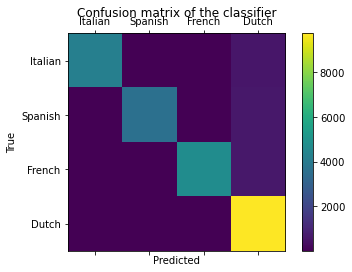

In [37]:
from sklearn.metrics import confusion_matrix
labels = ['Italian', 'Spanish', "French", "Dutch"]
cm = confusion_matrix(y_test, y_predicted, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()